# Loading the Data

In [30]:
import pandas as pd
from tqdm.auto import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
df_gpt35 = pd.read_csv('data/results-gpt35.csv')
df_gpt4o = pd.read_csv('data/results-gpt4o.csv')
df_gpt4o_mini = pd.read_csv('data/results-gpt4o-mini.csv')

In [32]:
results_gpt35 = df_gpt35.to_dict(orient='records')
results_gpt4o = df_gpt4o.to_dict(orient='records')
results_gpt4o_mini = df_gpt4o_mini.to_dict(orient='records')

# Embedding Model and Initial Tests

In [33]:
from sentence_transformers import SentenceTransformer

model_name = 'multi-qa-MiniLM-L6-cos-v1'
model = SentenceTransformer(model_name)

c:\Users\anacs\anaconda3\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [34]:
record = results_gpt4o[0]

In [35]:
answer_orig = record['answer_orig']
answer_llm = record['answer_llm']

v_llm = model.encode(answer_llm)
v_orig = model.encode(answer_orig)

v_llm.dot(v_orig)

0.5345327

# Cosine Similarity Functions

In [36]:
def compute_similarity(record):
    answer_orig = record['answer_orig']
    answer_llm = record['answer_llm']

    v_llm = model.encode(answer_llm)
    v_orig = model.encode(answer_orig)

    return v_llm.dot(v_orig)

# GPT 4o

In [37]:
similarity = []

for record in tqdm(results_gpt4o):
    sim = compute_similarity(record)
    similarity.append(sim)

  0%|          | 0/1830 [00:00<?, ?it/s]

In [38]:
df_gpt4o['cosine'] = similarity
df_gpt4o.head()

,answer_llm,answer_orig,document,question,course,cosine
0,The CONTEXT provided does not give specific in...,Machine Learning Zoomcamp FAQ\r\nThe purpose o...,0227b872,Where can I sign up for the course?,machine-learning-zoomcamp,0.534533
1,You can sign up for the Machine Learning Zoomc...,Machine Learning Zoomcamp FAQ\r\nThe purpose o...,0227b872,Can you provide a link to sign up?,machine-learning-zoomcamp,0.696121
2,"Yes, there is an FAQ for the Machine Learning ...",Machine Learning Zoomcamp FAQ\r\nThe purpose o...,0227b872,Is there an FAQ for this Machine Learning course?,machine-learning-zoomcamp,0.717514
3,"No, the provided context does not include any ...",Machine Learning Zoomcamp FAQ\r\nThe purpose o...,0227b872,Does this course have a GitHub repository for ...,machine-learning-zoomcamp,-0.000328
4,To structure your questions and answers for th...,Machine Learning Zoomcamp FAQ\r\nThe purpose o...,0227b872,How can I structure my questions and answers f...,machine-learning-zoomcamp,0.387620


In [39]:
df_gpt4o['cosine'].describe()

count    1830.000000
mean        0.679129
std         0.217995
min        -0.153426
25%         0.591460
50%         0.734788
75%         0.835390
max         0.995339
Name: cosine, dtype: float64

c:\Users\anacs\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


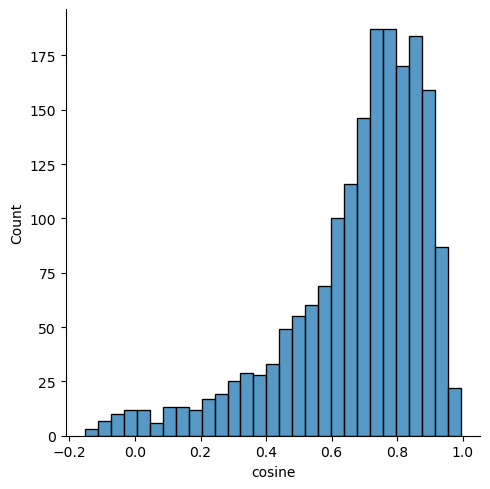

In [40]:
sns.displot(df_gpt4o['cosine'])

# GPT 3.5 Turbo

In [41]:
similarity = []

for record in tqdm(results_gpt35):
    sim = compute_similarity(record)
    similarity.append(sim)

  0%|          | 0/1830 [00:00<?, ?it/s]

In [42]:
df_gpt35['cosine'] = similarity
df_gpt35.head()

,answer_llm,answer_orig,document,question,course,cosine
0,You can sign up for the course by going to the...,Machine Learning Zoomcamp FAQ\r\nThe purpose o...,0227b872,Where can I sign up for the course?,machine-learning-zoomcamp,0.421822
1,"I am sorry, but there is no direct link provid...",Machine Learning Zoomcamp FAQ\r\nThe purpose o...,0227b872,Can you provide a link to sign up?,machine-learning-zoomcamp,0.415674
2,"Yes, there is an FAQ for the Machine Learning ...",Machine Learning Zoomcamp FAQ\r\nThe purpose o...,0227b872,Is there an FAQ for this Machine Learning course?,machine-learning-zoomcamp,0.726250
3,"No, the course does not have a GitHub reposito...",Machine Learning Zoomcamp FAQ\r\nThe purpose o...,0227b872,Does this course have a GitHub repository for ...,machine-learning-zoomcamp,0.039753
4,Based on the information provided in the FAQ d...,Machine Learning Zoomcamp FAQ\r\nThe purpose o...,0227b872,How can I structure my questions and answers f...,machine-learning-zoomcamp,0.365514


In [43]:
df_gpt35['cosine'].describe()

count    1830.000000
mean        0.657599
std         0.226063
min        -0.168921
25%         0.546505
50%         0.714783
75%         0.817262
max         1.000000
Name: cosine, dtype: float64

C:\Users\anacs\AppData\Local\Temp\ipykernel_21532\2569502874.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_gpt4o['cosine'], label='gpt-4o')
C:\Users\anacs\AppData\Local\Temp\ipykernel_21532\2569502874.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_gpt35['cosine'], label='gpt-3.5

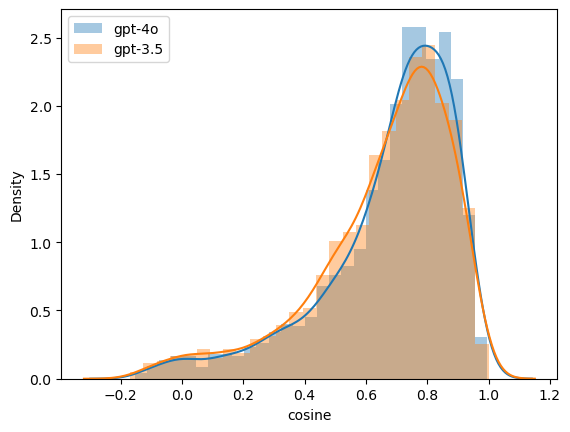

In [44]:
sns.distplot(df_gpt4o['cosine'], label='gpt-4o')
sns.distplot(df_gpt35['cosine'], label='gpt-3.5')

plt.legend()

# GPT 4o Mini

In [45]:
similarity = []

for record in tqdm(results_gpt4o_mini):
    sim = compute_similarity(record)
    similarity.append(sim)

  0%|          | 0/1830 [00:00<?, ?it/s]

In [46]:
df_gpt4o_mini['cosine'] = similarity
df_gpt4o_mini.head()

,answer_llm,answer_orig,document,question,course,cosine
0,You can sign up for the course by visiting the...,Machine Learning Zoomcamp FAQ\r\nThe purpose o...,0227b872,Where can I sign up for the course?,machine-learning-zoomcamp,0.388595
1,You can sign up using the link provided in the...,Machine Learning Zoomcamp FAQ\r\nThe purpose o...,0227b872,Can you provide a link to sign up?,machine-learning-zoomcamp,0.298360
2,"Yes, there is an FAQ for the Machine Learning ...",Machine Learning Zoomcamp FAQ\r\nThe purpose o...,0227b872,Is there an FAQ for this Machine Learning course?,machine-learning-zoomcamp,0.583048
3,The context does not provide any specific info...,Machine Learning Zoomcamp FAQ\r\nThe purpose o...,0227b872,Does this course have a GitHub repository for ...,machine-learning-zoomcamp,-0.019481
4,To structure your questions and answers for th...,Machine Learning Zoomcamp FAQ\r\nThe purpose o...,0227b872,How can I structure my questions and answers f...,machine-learning-zoomcamp,0.358467


In [47]:
df_gpt4o_mini['cosine'].describe()

count    1830.000000
mean        0.680332
std         0.215962
min        -0.141910
25%         0.585866
50%         0.733998
75%         0.836750
max         0.982701
Name: cosine, dtype: float64

C:\Users\anacs\AppData\Local\Temp\ipykernel_21532\4273759942.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_gpt4o['cosine'], label='gpt-4o')
C:\Users\anacs\AppData\Local\Temp\ipykernel_21532\4273759942.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_gpt35['cosine'], label='gpt-3.5

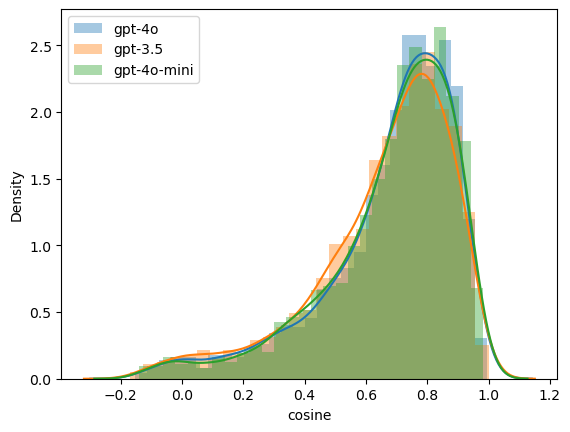

In [48]:
sns.distplot(df_gpt4o['cosine'], label='gpt-4o')
sns.distplot(df_gpt35['cosine'], label='gpt-3.5')
sns.distplot(df_gpt4o_mini['cosine'], label='gpt-4o-mini')

plt.legend()